In [4]:
import itertools
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import NullFormatter
import pandas as pd
import numpy as np
import matplotlib.ticker as ticker
from sklearn import preprocessing
%matplotlib inline

In [5]:
df = pd.read_csv('https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/Module%206/cbb.csv')
df.head(9)

#The dataframe shows:
#TEAM	The Division I college basketball school
#CONF	The Athletic Conference in which the school participates in (A10 = Atlantic 10, ACC = Atlantic Coast Conference, AE = America East, Amer = American, ASun = ASUN, B10 = Big Ten, B12 = Big 12, BE = Big East, BSky = Big Sky, BSth = Big South, BW = Big West, CAA = Colonial Athletic Association, CUSA = Conference USA, Horz = Horizon League, Ivy = Ivy League, MAAC = Metro Atlantic Athletic Conference, MAC = Mid-American Conference, MEAC = Mid-Eastern Athletic Conference, MVC = Missouri Valley Conference, MWC = Mountain West, NEC = Northeast Conference, OVC = Ohio Valley Conference, P12 = Pac-12, Pat = Patriot League, SB = Sun Belt, SC = Southern Conference, SEC = South Eastern Conference, Slnd = Southland Conference, Sum = Summit League, SWAC = Southwestern Athletic Conference, WAC = Western Athletic Conference, WCC = West Coast Conference)
#G	Number of games played
#W	Number of games won
#ADJOE	Adjusted Offensive Efficiency (An estimate of the offensive efficiency (points scored per 100 possessions) a team would have against the average Division I defense)
#ADJDE	Adjusted Defensive Efficiency (An estimate of the defensive efficiency (points allowed per 100 possessions) a team would have against the average Division I offense)
#BARTHAG	Power Rating (Chance of beating an average Division I team)
#EFG_O	Effective Field Goal Percentage Shot
#EFG_D	Effective Field Goal Percentage Allowed
#TOR	Turnover Percentage Allowed (Turnover Rate)
#TORD	Turnover Percentage Committed (Steal Rate)
#ORB	Offensive Rebound Percentage
#DRB	Defensive Rebound Percentage
#FTR	Free Throw Rate (How often the given team shoots Free Throws)
#FTRD	Free Throw Rate Allowed
#2P_O	Two-Point Shooting Percentage
#2P_D	Two-Point Shooting Percentage Allowed
#3P_O	Three-Point Shooting Percentage
#3P_D	Three-Point Shooting Percentage Allowed
#ADJ_T	Adjusted Tempo (An estimate of the tempo (possessions per 40 minutes) a team would have against the team that wants to play at an average Division I tempo)
#WAB	Wins Above Bubble (The bubble refers to the cut off between making the NCAA March Madness Tournament and not making it)
#POSTSEASON	Round where the given team was eliminated or where their season ended (R68 = First Four, R64 = Round of 64, R32 = Round of 32, S16 = Sweet Sixteen, E8 = Elite Eight, F4 = Final Four, 2ND = Runner-up, Champion = Winner of the NCAA March Madness Tournament for that given year)
#SEED	Seed in the NCAA March Madness Tournament
#YEAR	 Season

,TEAM,CONF,G,W,ADJOE,ADJDE,BARTHAG,EFG_O,EFG_D,TOR,...,FTRD,2P_O,2P_D,3P_O,3P_D,ADJ_T,WAB,POSTSEASON,SEED,YEAR
0,North Carolina,ACC,40,33,123.3,94.9,0.9531,52.6,48.1,15.4,...,30.4,53.9,44.6,32.7,36.2,71.7,8.6,2ND,1.0,2016
1,Villanova,BE,40,35,123.1,90.9,0.9703,56.1,46.7,16.3,...,30.0,57.4,44.1,36.2,33.9,66.7,8.9,Champions,2.0,2016
2,Notre Dame,ACC,36,24,118.3,103.3,0.8269,54.0,49.5,15.3,...,26.0,52.9,46.5,37.4,36.9,65.5,2.3,E8,6.0,2016
3,Virginia,ACC,37,29,119.9,91.0,0.9600,54.8,48.4,15.1,...,33.4,52.6,46.3,40.3,34.7,61.9,8.6,E8,1.0,2016
4,Kansas,B12,37,32,120.9,90.4,0.9662,55.7,45.1,17.8,...,37.3,52.7,43.4,41.3,32.5,70.1,11.6,E8,1.0,2016
5,Oregon,P12,37,30,118.4,96.2,0.9163,52.3,48.9,16.1,...,32.0,52.6,46.1,34.4,36.2,69.0,6.7,E8,1.0,2016
6,Syracuse,ACC,37,23,111.9,93.6,0.8857,50.0,47.3,18.1,...,28.0,47.2,48.1,36.0,30.7,65.5,-0.3,F4,10.0,2016
7,Oklahoma,B12,37,29,118.2,94.1,0.9326,54.3,47.2,18.3,...,28.3,48.2,45.3,42.2,33.7,70.8,8.0,F4,2.0,2016
8,Davidson,A10,32,19,113.0,106.0,0.6767,52.0,52.0,14.2,...,30.6,51.1,52.2,35.5,34.3,71.3,-2.1,NaN,NaN,2016


In [6]:
#the win index
df['win_index'] = np.where(df.WAB > 7, 'True', 'False')

In [7]:
#Data Preprocessing:

In [8]:
df1 = df.loc[df['POSTSEASON'].str.contains('F4|S16|E8', na=False)]
df1.head()

,TEAM,CONF,G,W,ADJOE,ADJDE,BARTHAG,EFG_O,EFG_D,TOR,...,2P_O,2P_D,3P_O,3P_D,ADJ_T,WAB,POSTSEASON,SEED,YEAR,win_index
2,Notre Dame,ACC,36,24,118.3,103.3,0.8269,54.0,49.5,15.3,...,52.9,46.5,37.4,36.9,65.5,2.3,E8,6.0,2016,False
3,Virginia,ACC,37,29,119.9,91.0,0.9600,54.8,48.4,15.1,...,52.6,46.3,40.3,34.7,61.9,8.6,E8,1.0,2016,True
4,Kansas,B12,37,32,120.9,90.4,0.9662,55.7,45.1,17.8,...,52.7,43.4,41.3,32.5,70.1,11.6,E8,1.0,2016,True
5,Oregon,P12,37,30,118.4,96.2,0.9163,52.3,48.9,16.1,...,52.6,46.1,34.4,36.2,69.0,6.7,E8,1.0,2016,False
6,Syracuse,ACC,37,23,111.9,93.6,0.8857,50.0,47.3,18.1,...,47.2,48.1,36.0,30.7,65.5,-0.3,F4,10.0,2016,False


In [9]:
# here we can see that 32 teams made it to the sweet sixteen, 16 made it to the elite 8, and 8 made it to the final four
df1['POSTSEASON'].value_counts()

S16    32
E8     16
F4      8
Name: POSTSEASON, dtype: int64

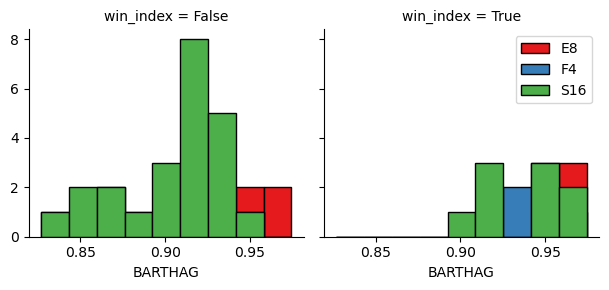

In [10]:
import seaborn as sns

bins = np.linspace(df1.BARTHAG.min(), df1.BARTHAG.max(), 10)
g = sns.FacetGrid(df1, col="win_index", hue="POSTSEASON", palette="Set1", col_wrap=6)
g.map(plt.hist, 'BARTHAG', bins=bins, ec="k")

g.axes[-1].legend()
plt.show()

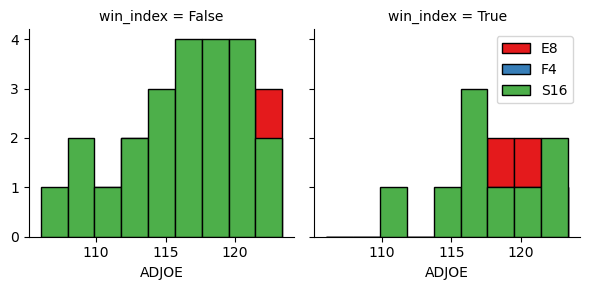

In [11]:
bins = np.linspace(df1.ADJOE.min(), df1.ADJOE.max(), 10)
g = sns.FacetGrid(df1, col="win_index", hue="POSTSEASON", palette="Set1", col_wrap=2)
g.map(plt.hist, 'ADJOE', bins=bins, ec="k")

g.axes[-1].legend()
plt.show()

In [12]:
#Feature selection and extraction:

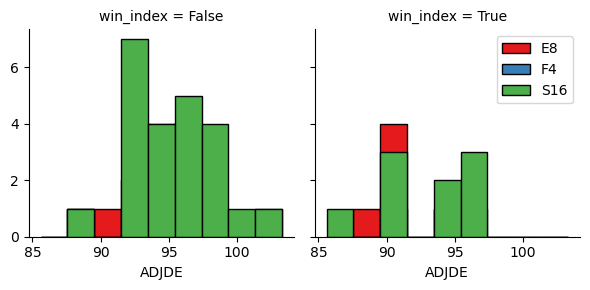

In [13]:
bins = np.linspace(df1.ADJDE.min(), df1.ADJDE.max(), 10)
g = sns.FacetGrid(df1, col="win_index", hue="POSTSEASON", palette="Set1", col_wrap=2)
g.map(plt.hist, 'ADJDE', bins=bins, ec="k")
g.axes[-1].legend()
plt.show()
#Adjusted Offensive Efficiency doesnt affect a teams ability to get into the final four

In [14]:
# Convert Categorical features to numerical values
#the pandas series shows us that 13% of teams with < 6 wins above bubble made it to the final four
#whereas almost 17% of teams with 7 or more wins above bubble made it to the final four
df1.groupby(['win_index'])['POSTSEASON'].value_counts(normalize=True)

win_index  POSTSEASON
False      S16           0.605263
           E8            0.263158
           F4            0.131579
True       S16           0.500000
           E8            0.333333
           F4            0.166667
Name: POSTSEASON, dtype: float64

In [15]:
df1['win_index'].replace(to_replace=['False','True'], value=[0,1],inplace=True)
df1.head()


C:\Users\moham\AppData\Local\Temp\ipykernel_25080\177498700.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['win_index'].replace(to_replace=['False','True'], value=[0,1],inplace=True)


,TEAM,CONF,G,W,ADJOE,ADJDE,BARTHAG,EFG_O,EFG_D,TOR,...,2P_O,2P_D,3P_O,3P_D,ADJ_T,WAB,POSTSEASON,SEED,YEAR,win_index
2,Notre Dame,ACC,36,24,118.3,103.3,0.8269,54.0,49.5,15.3,...,52.9,46.5,37.4,36.9,65.5,2.3,E8,6.0,2016,0
3,Virginia,ACC,37,29,119.9,91.0,0.9600,54.8,48.4,15.1,...,52.6,46.3,40.3,34.7,61.9,8.6,E8,1.0,2016,1
4,Kansas,B12,37,32,120.9,90.4,0.9662,55.7,45.1,17.8,...,52.7,43.4,41.3,32.5,70.1,11.6,E8,1.0,2016,1
5,Oregon,P12,37,30,118.4,96.2,0.9163,52.3,48.9,16.1,...,52.6,46.1,34.4,36.2,69.0,6.7,E8,1.0,2016,0
6,Syracuse,ACC,37,23,111.9,93.6,0.8857,50.0,47.3,18.1,...,47.2,48.1,36.0,30.7,65.5,-0.3,F4,10.0,2016,0


In [16]:
#FEATURE SELECTION:


In [17]:
X = df1[['G', 'W', 'ADJOE', 'ADJDE', 'BARTHAG', 'EFG_O', 'EFG_D',
       'TOR', 'TORD', 'ORB', 'DRB', 'FTR', 'FTRD', '2P_O', '2P_D', '3P_O',
       '3P_D', 'ADJ_T', 'WAB', 'SEED', 'win_index']]
X[0:5]

,G,W,ADJOE,ADJDE,BARTHAG,EFG_O,EFG_D,TOR,TORD,ORB,...,FTR,FTRD,2P_O,2P_D,3P_O,3P_D,ADJ_T,WAB,SEED,win_index
2,36,24,118.3,103.3,0.8269,54.0,49.5,15.3,14.8,32.7,...,32.9,26.0,52.9,46.5,37.4,36.9,65.5,2.3,6.0,0
3,37,29,119.9,91.0,0.9600,54.8,48.4,15.1,18.8,29.9,...,32.1,33.4,52.6,46.3,40.3,34.7,61.9,8.6,1.0,1
4,37,32,120.9,90.4,0.9662,55.7,45.1,17.8,18.5,32.2,...,38.6,37.3,52.7,43.4,41.3,32.5,70.1,11.6,1.0,1
5,37,30,118.4,96.2,0.9163,52.3,48.9,16.1,20.2,34.1,...,40.3,32.0,52.6,46.1,34.4,36.2,69.0,6.7,1.0,0
6,37,23,111.9,93.6,0.8857,50.0,47.3,18.1,20.4,33.5,...,35.4,28.0,47.2,48.1,36.0,30.7,65.5,-0.3,10.0,0


In [18]:
y = df1['POSTSEASON'].values
y[0:8]
#lables:

array(['E8', 'E8', 'E8', 'E8', 'F4', 'F4', 'S16', 'S16'], dtype=object)

In [19]:
#NORMALIZE THE DATA:

In [20]:
X= preprocessing.StandardScaler().fit(X).transform(X)
X[0:5]

array([[-0.43331874, -1.26140173,  0.28034482,  2.74329908, -2.45717765,
         0.10027963,  0.94171924, -1.16188145, -1.71391372,  0.12750511,
         1.33368704, -0.4942211 , -0.87998988,  0.02784185,  0.00307239,
         0.22576157,  1.59744386, -1.12106011, -1.0448016 ,  0.49716104,
        -0.6882472 ],
       [ 0.40343468,  0.35874728,  0.64758014, -0.90102957,  1.127076  ,
         0.39390887,  0.38123706, -1.29466791, -0.03522254, -0.62979797,
        -1.31585883, -0.68542235,  0.55458056, -0.07167795, -0.0829545 ,
         1.32677295,  0.65081046, -2.369021  ,  0.98050611, -1.14054592,
         1.45296631],
       [ 0.40343468,  1.33083669,  0.87710222, -1.0788017 ,  1.29403598,
         0.72424177, -1.30020946,  0.49794919, -0.16112438, -0.00772758,
        -0.27908001,  0.86808783,  1.31063795, -0.03850468, -1.33034432,
         1.70643205, -0.29582294,  0.47355659,  1.94493836, -1.14054592,
         1.45296631],
       [ 0.40343468,  0.68277708,  0.30329703,  0.63966222

In [21]:
#TRAIN TEST SPLIT:

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Validation set:', X_test.shape,  y_test.shape)

Train set: (44, 21) (44,)
Validation set: (12, 21) (12,)


In [22]:
#BUILD A KNN MODEL TO FIND THE ACCURACY ON THE VALIDATION DATA

from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier

k = 5
neigh = KNeighborsClassifier(n_neighbors = k).fit(X_train,y_train)
yhat = neigh.predict(X_test)

print("Validaton Data Accuracy:\t%.10f" %accuracy_score(y_test, yhat))

Validaton Data Accuracy:	0.6666666667


C:\Users\moham\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


In [58]:
for i in range(1,16):
    neigh = KNeighborsClassifier(n_neighbors = i).fit(X_train,y_train)
    yhat = neigh.predict(X_test)
    print("Validaton Data Accuracy: \t%.10f" %accuracy_score(y_test, yhat))

Validaton Data Accuracy: 	0.3333333333
Validaton Data Accuracy: 	0.3333333333
Validaton Data Accuracy: 	0.5000000000
Validaton Data Accuracy: 	0.5833333333
Validaton Data Accuracy: 	0.6666666667
Validaton Data Accuracy: 	0.5833333333
Validaton Data Accuracy: 	0.5833333333
Validaton Data Accuracy: 	0.6666666667
Validaton Data Accuracy: 	0.5833333333
Validaton Data Accuracy: 	0.5833333333
Validaton Data Accuracy: 	0.5833333333
Validaton Data Accuracy: 	0.5000000000
Validaton Data Accuracy: 	0.5833333333
Validaton Data Accuracy: 	0.5833333333
Validaton Data Accuracy: 	0.5833333333


C:\Users\moham\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\moham\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

In [24]:
#USING A DECISION TREE


In [25]:
from sklearn.tree import DecisionTreeClassifier

In [29]:
#find the minimum value for max_depth that can improve the result:
for i in range(1,16):
    tree = DecisionTreeClassifier(max_depth = i).fit(X_train,y_train)
    predTree = tree.predict(X_test)
    print (predTree [0:3])
    print("DecisionTrees's Accuracy with max_depth=%i:\t%.10f" %(i, accuracy_score(y_test, predTree)))

['S16' 'S16' 'S16']
DecisionTrees's Accuracy with max_depth=1:	0.6666666667
['S16' 'S16' 'S16']
DecisionTrees's Accuracy with max_depth=2:	0.3333333333
['E8' 'S16' 'E8']
DecisionTrees's Accuracy with max_depth=3:	0.4166666667
['E8' 'S16' 'F4']
DecisionTrees's Accuracy with max_depth=4:	0.4166666667
['E8' 'S16' 'F4']
DecisionTrees's Accuracy with max_depth=5:	0.4166666667
['F4' 'S16' 'E8']
DecisionTrees's Accuracy with max_depth=6:	0.5000000000
['E8' 'S16' 'F4']
DecisionTrees's Accuracy with max_depth=7:	0.4166666667
['E8' 'S16' 'F4']
DecisionTrees's Accuracy with max_depth=8:	0.4166666667
['F4' 'S16' 'E8']
DecisionTrees's Accuracy with max_depth=9:	0.5000000000
['F4' 'S16' 'E8']
DecisionTrees's Accuracy with max_depth=10:	0.5000000000
['E8' 'S16' 'E8']
DecisionTrees's Accuracy with max_depth=11:	0.4166666667
['E8' 'S16' 'E8']
DecisionTrees's Accuracy with max_depth=12:	0.4166666667
['E8' 'S16' 'E8']
DecisionTrees's Accuracy with max_depth=13:	0.4166666667
['E8' 'S16' 'F4']
DecisionTree

In [ ]:
#USING SUPPORT VECTOR MACHINE

In [30]:
#Train the support vector machine model and determine the accuracy on the validation data for each kernel.
#Find the kernel (linear, poly, rbf, sigmoid) that provides the best score on the validation data and train a SVM using it.

from sklearn import svm

In [45]:
kernels = ['linear', 'poly', 'rbf', 'sigmoid']

for i in kernels:
    clf = svm.SVC(kernel = i)
    clf.fit(X_train,y_train)
    predSvm = clf.predict(X_test)
    print("Accuracy with kernel", i, accuracy_score(y_test, predSvm))

Accuracy with kernel linear 0.25
Accuracy with kernel poly 0.6666666666666666
Accuracy with kernel rbf 0.5833333333333334
Accuracy with kernel sigmoid 0.5833333333333334


In [ ]:
#LOGISTIC REGRESSION

In [47]:
#Train a logistic regression model and determine the accuracy of the validation data (set C=0.01)
from sklearn.linear_model import LogisticRegression

In [52]:
LR = LogisticRegression(C=0.01, solver='lbfgs').fit(X_train,y_train)
predLr = LR.predict(X_test)
print("Logistic Regression Accuracy with C=0.01:\t%.10f" %accuracy_score(y_test, predLr))

Logistic Regression Accuracy with C=0.01:	0.5833333333


In [53]:
# Model Evaluation using Test set
from sklearn.metrics import f1_score
# for f1_score please set the average parameter to 'micro'
from sklearn.metrics import log_loss

In [54]:
def jaccard_index(predictions, true):
    if (len(predictions) == len(true)):
        intersect = 0;
        for x,y in zip(predictions, true):
            if (x == y):
                intersect += 1
        return intersect / (len(predictions) + len(true) - intersect)
    else:
        return -1

In [55]:
# Load Test set for evaluation
test_df = pd.read_csv('https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0120ENv3/Dataset/ML0101EN_EDX_skill_up/basketball_train.csv',error_bad_lines=False)
test_df.head()


C:\Users\moham\AppData\Local\Temp\ipykernel_25080\1640893494.py:2: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  test_df = pd.read_csv('https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0120ENv3/Dataset/ML0101EN_EDX_skill_up/basketball_train.csv',error_bad_lines=False)


,TEAM,CONF,G,W,ADJOE,ADJDE,BARTHAG,EFG_O,EFG_D,TOR,...,FTRD,2P_O,2P_D,3P_O,3P_D,ADJ_T,WAB,POSTSEASON,SEED,YEAR
0,North Carolina,ACC,40,33,123.3,94.9,0.9531,52.6,48.1,15.4,...,30.4,53.9,44.6,32.7,36.2,71.7,8.6,2ND,1.0,2016
1,Villanova,BE,40,35,123.1,90.9,0.9703,56.1,46.7,16.3,...,30.0,57.4,44.1,36.2,33.9,66.7,8.9,Champions,2.0,2016
2,Notre Dame,ACC,36,24,118.3,103.3,0.8269,54.0,49.5,15.3,...,26.0,52.9,46.5,37.4,36.9,65.5,2.3,E8,6.0,2016
3,Virginia,ACC,37,29,119.9,91.0,0.9600,54.8,48.4,15.1,...,33.4,52.6,46.3,40.3,34.7,61.9,8.6,E8,1.0,2016
4,Kansas,B12,37,32,120.9,90.4,0.9662,55.7,45.1,17.8,...,37.3,52.7,43.4,41.3,32.5,70.1,11.6,E8,1.0,2016


In [56]:
test_df['windex'] = np.where(test_df.WAB > 7, 'True', 'False')
test_df1 = test_df[test_df['POSTSEASON'].str.contains('F4|S16|E8', na=False)]
test_Feature = test_df1[['G', 'W', 'ADJOE', 'ADJDE', 'BARTHAG', 'EFG_O', 'EFG_D',
       'TOR', 'TORD', 'ORB', 'DRB', 'FTR', 'FTRD', '2P_O', '2P_D', '3P_O',
       '3P_D', 'ADJ_T', 'WAB', 'SEED', 'windex']]
test_Feature['windex'].replace(to_replace=['False','True'], value=[0,1],inplace=True)
test_X=test_Feature
test_X= preprocessing.StandardScaler().fit(test_X).transform(test_X)
test_X[0:5]

C:\Users\moham\AppData\Local\Temp\ipykernel_25080\3609998696.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_Feature['windex'].replace(to_replace=['False','True'], value=[0,1],inplace=True)


array([[-4.08074446e-01, -1.10135297e+00,  3.37365934e-01,
         2.66479976e+00, -2.46831661e+00,  2.13703245e-01,
         9.44090550e-01, -1.19216365e+00, -1.64348924e+00,
         1.45405982e-02,  1.29523097e+00, -6.23533182e-01,
        -9.31788560e-01,  1.42784371e-01,  1.68876201e-01,
         2.84500844e-01,  1.62625961e+00, -8.36649260e-01,
        -9.98500539e-01,  4.84319174e-01, -6.77003200e-01],
       [ 3.63958290e-01,  3.26326807e-01,  7.03145068e-01,
        -7.13778644e-01,  1.07370841e+00,  4.82633172e-01,
         4.77498943e-01, -1.32975879e+00, -6.86193316e-02,
        -7.35448152e-01, -1.35447914e+00, -8.06829025e-01,
         3.41737757e-01,  4.96641291e-02,  9.40576311e-02,
         1.37214061e+00,  6.93854620e-01, -2.00860931e+00,
         9.80549967e-01, -1.19401460e+00,  1.47709789e+00],
       [ 3.63958290e-01,  1.18293467e+00,  9.31757027e-01,
        -8.78587347e-01,  1.23870131e+00,  7.85179340e-01,
        -9.22275877e-01,  5.27775662e-01, -1.86734575e

In [57]:
test_y = test_df1['POSTSEASON'].values
test_y[0:5]

array(['E8', 'E8', 'E8', 'E8', 'F4'], dtype=object)

In [59]:
#EVALUATE KNN

In [66]:
from sklearn.metrics import jaccard_score
k = 5
neigh = KNeighborsClassifier(n_neighbors = k).fit(X_train,y_train)
yhat = neigh.predict(test_X)

print("Avg F1-score: %.10f" % f1_score(test_y, yhat, average='micro'))
print("Jaccard score: %.10f" % jaccard_score(test_y, yhat, average='micro'))



Avg F1-score: 0.6285714286
Jaccard score: 0.4583333333


C:\Users\moham\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


In [67]:
#EVALUATE DECISION TREE

In [72]:
depth = 1
tree = DecisionTreeClassifier(max_depth = depth).fit(X_train,y_train)
predTree = tree.predict(test_X)

print("Avg F1-score: %.10f" % f1_score(test_y, predTree, average='micro'))
print("Jaccard score: %.10f" % jaccard_score(test_y, predTree, average='micro'))

Avg F1-score: 0.6428571429
Jaccard score: 0.4736842105


In [73]:
#EVALUATE SVM

In [74]:
clf = svm.SVC(kernel = 'poly')
clf.fit(X_train,y_train)
predSvm = clf.predict(test_X)
print("Avg F1-score: %.10f" % f1_score(test_y, predSvm, average='micro'))
print("Jaccard score: %.10f" % jaccard_score(test_y, predSvm, average='micro'))

Avg F1-score: 0.6857142857
Jaccard score: 0.5217391304


In [76]:
#EVALUATE LOGISTIC REGRESSION

In [82]:
LR = LogisticRegression(C=0.01, solver='lbfgs').fit(X_train,y_train)
predLr = LR.predict(test_X)
print("Avg F1-score: %.10f" % f1_score(test_y, predLr, average='micro'))
print("Jaccard score: %.10f" % jaccard_score(test_y, predLr, average='micro'))

predLr_proba = LR.predict_proba(test_X)
print("LogLoss: %.2f" % log_loss(test_y, predLr_proba))

Avg F1-score: 0.5714285714
Jaccard score: 0.4000000000
LogLoss: 0.88


In [84]:
#KNN(Accuracy: 66%, Jaccard: 45%, F1: 63%)
#DECISION TREE(Accuracy: 66%, Jaccard: 47%, F1: 64%)
#SVM (Accuracy: 66%, Jaccard: 52%, F1: 68%)
#LOGISTIC REGRESSION(Accuracy: 58%, Jaccard: 40%, F1: 57%, LogLoss: 0.88)

In [85]:
#SVM with polynomial kernel acheived the best results

In [86]:
#When developing predictive models for basketball tournaments or sports in general,
#it's important to remember that the complexity of the game makes it difficult to accurately predict outcomes.
#In sports betting, an accuracy rate of 55% or higher is typically considered successful as it
#indicates profitability despite the many factors that can influence the results.